In [1]:
import pandas as pd
# read data from text files
data = pd.read_table('flight_edges.tsv',header=2)   
# create feature names(11 features)
data.columns = ['Origin','Destination','Origin City', 'Destination City', 'Passengers', 'Seats', 'Flights', 'Distance','Fly Date', 'Origin Population', 'Destination Population']

In [2]:
# import module
# use matplotlib.pyplot to do plotting
import matplotlib.pyplot as plt
%matplotlib inline
# use plotly to draw bar plot and USA map
import plotly.plotly as py
import plotly.graph_objs as go

In [ ]:
# check data format and distribution
data.info()
data.describe()

In [ ]:
# check any Null values in the column features
data.isnull().any()
# check negative values
data[data < 0].count()

In [ ]:
import cPickle
f=open ('myfile.dat','wb') # write-binary mode
cPickle.dump(data, f)
f.close()

In [3]:
# convert dateframe of Fly Date
import datetime
data['Fly Date'] = data['Fly Date'].apply(str)
data['Fly Year']=data['Fly Date'].apply(lambda x: str(x)[:4])
data['Fly Month']=data['Fly Date'].apply(lambda x: str(x)[4:6])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



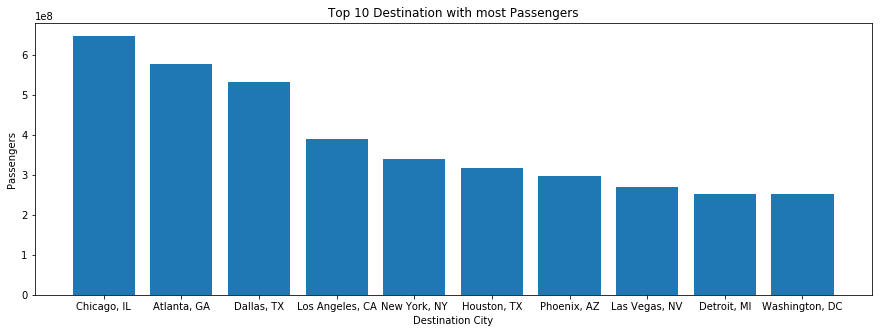

In [11]:
top_destination_passengers = data.groupby(['Destination City']).sum().sort('Passengers', ascending=False).head(10)
# the histogram of the Top 10 Destination with most passengers
# store values into list
top10_destination_list = top_destination_passengers.index.get_level_values(0).tolist()
top10_passengers_list = list(top_destination_passengers['Passengers'].values)
City_Code = [1,2,3,4,5,6,7,8,9,10]
LABELS = top10_destination_list
plt.figure(figsize=(15,5))
plt.bar(City_Code, top10_passengers_list, align='center')
plt.xticks(City_Code, LABELS)
plt.title("Top 10 Destination with most Passengers")
plt.xlabel("Destination City")
plt.ylabel("Passengers")
plt.show()

In [5]:
top_destination_passengers = data.groupby(['Destination City']).sum().sort('Passengers', ascending=False).head(10)
# the bar plot of the Top 10 Destination with most passengers
# store values into list
top10_destination_list = top_destination_passengers.index.get_level_values(0).tolist()
top10_passengers_list = list(top_destination_passengers['Passengers'].values)
values = top10_passengers_list
labels = top10_destination_list
trace = go.Pie(labels=labels, values=values)
py.iplot([trace], filename='basic_pie_chart')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


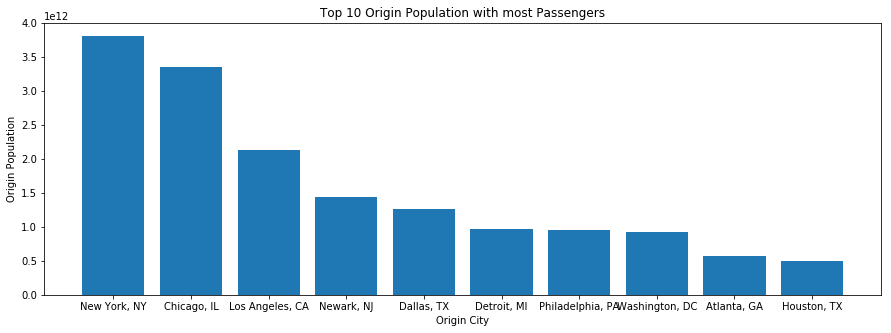

In [11]:
top_destination_passengers = data.groupby(['Origin City']).sum().sort('Origin Population', ascending=False).head(10)
# the histogram of the Top 10 Destination with most passengers
# store values into list
top10_destination_list = top_destination_passengers.index.get_level_values(0).tolist()
top10_passengers_list = list(top_destination_passengers['Origin Population'].values)
City_Code = [1,2,3,4,5,6,7,8,9,10]
LABELS = top10_destination_list
plt.figure(figsize=(15,5))
plt.bar(City_Code, top10_passengers_list, align='center')
plt.xticks(City_Code, LABELS)
plt.title("Top 10 Origin Population with most Passengers")
plt.xlabel("Origin City")
plt.ylabel("Origin Population")
plt.show()

In [6]:
top_destination_passengers = data.groupby(['Origin City']).sum().sort('Origin Population', ascending=False).head(10)
# the bar plot of the Top 10 Origin with most passengers
# store values into list
top10_destination_list = top_destination_passengers.index.get_level_values(0).tolist()
top10_passengers_list = list(top_destination_passengers['Origin Population'].values)
values = top10_passengers_list
labels = top10_destination_list
trace = go.Pie(labels=labels, values=values)
py.iplot([trace], filename='basic_pie_chart')

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning:

sort(columns=....) is deprecated, use sort_values(by=.....)



### Top 10 origin population has close relationship to top 10 Destination with most Passengers. We see that New York, Chicago, Los Angeles, Dallas, Detroit, Washington DC, Atlanta, Houston are both top destinatons and with high origin population. Generally, high top origin population will be top destinations for visitors to travel.

In [17]:
data.groupby(['Fly Year','Fly Month']).sum().head(10)

Passengers     Seats  Flights   Distance  \
Fly Year Fly Month                                             
1990     01           27605138  55539260   422366  7827975.0   
         02           27010787  49894444   379961  7684717.0   
         03           32948359  56465593   429472  7635153.0   
         04           31177552  55149836   420019  7359825.0   
         05           31203382  56815046   435517  7645908.0   
         06           32904499  55641274   426642  7822371.0   
         07           33370927  57541575   441353  7560267.0   
         08           35732969  58294474   446416  7601305.0   
         09           28583070  54913628   421588  7965348.0   
         10           31292501  57517372   442574  7471867.0   

                    Origin Population  Destination Population  
Fly Year Fly Month                                             
1990     01               70916223552             71693626139  
         02               69596807481             68886987291  
         03               68680523618             68189402036  
         04               66817182721             65762943942  
         05               70626316107             71946129031  
         06               70429380534             71221770896  
         07               68212650661             71547425122  
         08               68168517173             70393664881  
         09               72567806977             73224700678  
         10               68757509334             69297437947

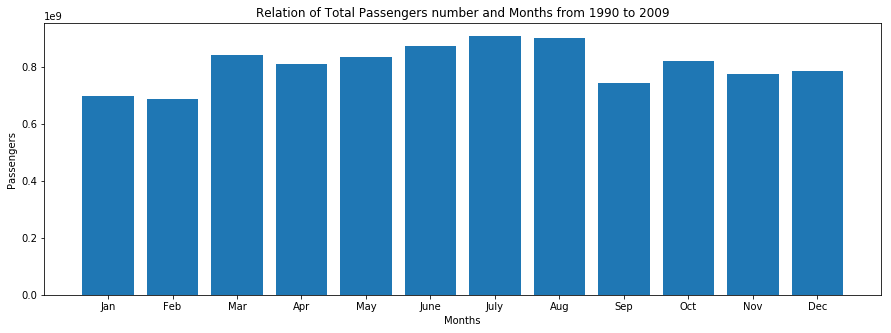

In [18]:
# the histogram of the Relation of Total Passengers number and Months from 1990 to 2009
month_passengers = data.groupby(['Fly Month'])['Passengers'].sum().tolist()
month_list = list(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sep','Oct','Nov','Dec'])
month_Code = [1,2,3,4,5,6,7,8,9,10,11,12]
LABELS = month_list
plt.figure(figsize=(15,5))
plt.bar(month_Code, month_passengers, align='center')
plt.xticks(month_Code, LABELS)
plt.title("Relation of Total Passengers number and Months from 1990 to 2009")
plt.xlabel("Months")
plt.ylabel("Passengers")
plt.show()

### Grouped by Months and have peaks at June, July(Summer Break) and another peak at March(Spring Break)

In [19]:
data.groupby(['Fly Month'])['Destination City'].value_counts().head(10)

Fly Month  Destination City
01         Chicago, IL         15849
           Atlanta, GA         11065
           Dallas, TX          10319
           New York, NY         9026
           Detroit, MI          8986
           Houston, TX          8634
           Minneapolis, MN      8402
           Washington, DC       7973
           Los Angeles, CA      7253
           Charlotte, NC        7026
Name: Destination City, dtype: int64

In [4]:
# define spring, summer, and winter break and apply into new column feature in dataframe
def label_break (row):
    if row['Fly Month'] == '01':
        return 'Winter Break'
    if row['Fly Month'] == '02':
        return 'Other'
    if row['Fly Month'] == '03':
        return 'Spring Break'
    if row['Fly Month'] == '04':
        return 'Other'
    if row['Fly Month'] == '05':
        return 'Other'
    if row['Fly Month'] == '06':
        return 'Summer Break'
    if row['Fly Month'] == '07':
        return 'Summer Break'
    if row['Fly Month'] == '08':
        return 'Summer Break'
    if row['Fly Month'] == '09':
        return 'Other'
    if row['Fly Month'] == '10':
        return 'Other'
    if row['Fly Month'] == '11':
        return 'Other'
    if row['Fly Month'] == '12':
        return 'Winter Break'
    return 'Other'
data['Break'] = data.apply (lambda row: label_break (row),axis=1)

In [21]:
SummerBreak_df  = data.ix[(data['Break'] == 'Summer Break')]
summer_list = SummerBreak_df.groupby(['Break'])['Destination City'].value_counts().head(10)
print summer_list

Break         Destination City
Summer Break  Chicago, IL         47276
              Atlanta, GA         33446
              Dallas, TX          31871
              New York, NY        28823
              Houston, TX         26958
              Detroit, MI         26618
              Minneapolis, MN     24526
              Washington, DC      24014
              Charlotte, NC       21203
              Newark, NJ          21181
Name: Destination City, dtype: int64


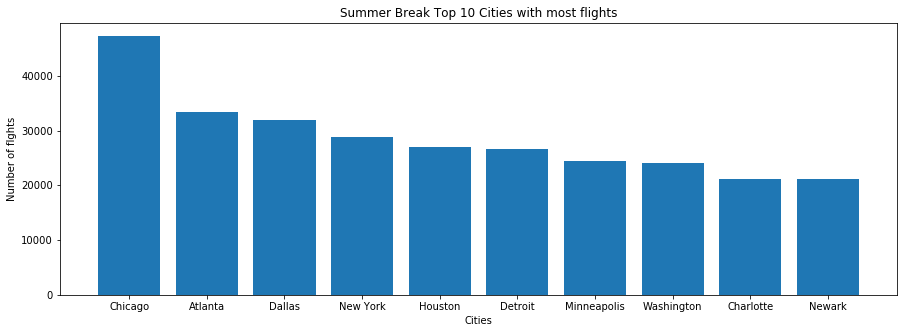

In [22]:
summer_break_flights = summer_list.tolist()
city_list = list(['Chicago','Atlanta','Dallas','New York','Houston','Detroit','Minneapolis','Washington','Charlotte','Newark'])
city_Code = [1,2,3,4,5,6,7,8,9,10]
LABELS = city_list
plt.figure(figsize=(15,5))
plt.bar(city_Code, summer_break_flights, align='center')
plt.xticks(city_Code, LABELS)
plt.title("Summer Break Top 10 Cities with most flights")
plt.xlabel("Cities")
plt.ylabel("Number of flghts")
plt.show()

In [23]:
WinterBreak_df  = data.ix[(data['Break'] == 'Winter Break')]
winter_list = WinterBreak_df.groupby(['Break'])['Destination City'].value_counts().head(10)
print winter_list

Break         Destination City
Winter Break  Chicago, IL         32036
              Atlanta, GA         22713
              Dallas, TX          21526
              Detroit, MI         18469
              New York, NY        18235
              Houston, TX         17831
              Minneapolis, MN     17321
              Washington, DC      16086
              Los Angeles, CA     14882
              Charlotte, NC       14216
Name: Destination City, dtype: int64


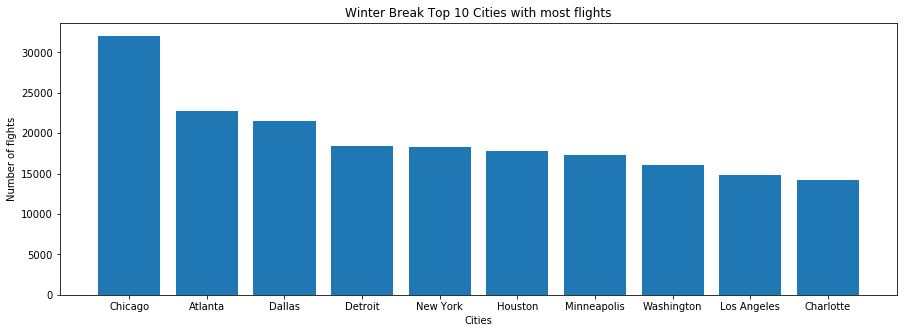

In [24]:
winter_break_flights = winter_list.tolist()
city_list = list(['Chicago','Atlanta','Dallas','Detroit','New York','Houston','Minneapolis','Washington','Los Angeles','Charlotte'])
city_Code = [1,2,3,4,5,6,7,8,9,10]
LABELS = city_list
plt.figure(figsize=(15,5))
plt.bar(city_Code, winter_break_flights, align='center')
plt.xticks(city_Code, LABELS)
plt.title("Winter Break Top 10 Cities with most flights")
plt.xlabel("Cities")
plt.ylabel("Number of flghts")
plt.show()

In [25]:
SpringBreak_df  = data.ix[(data['Break'] == 'Spring Break')]
spring_list = SpringBreak_df.groupby(['Break'])['Destination City'].value_counts().head(10)
print spring_list

Break         Destination City
Spring Break  Chicago, IL         15412
              Atlanta, GA         10999
              Dallas, TX          10490
              New York, NY         8781
              Detroit, MI          8650
              Houston, TX          8633
              Minneapolis, MN      8103
              Washington, DC       7454
              Charlotte, NC        6897
              Los Angeles, CA      6883
Name: Destination City, dtype: int64


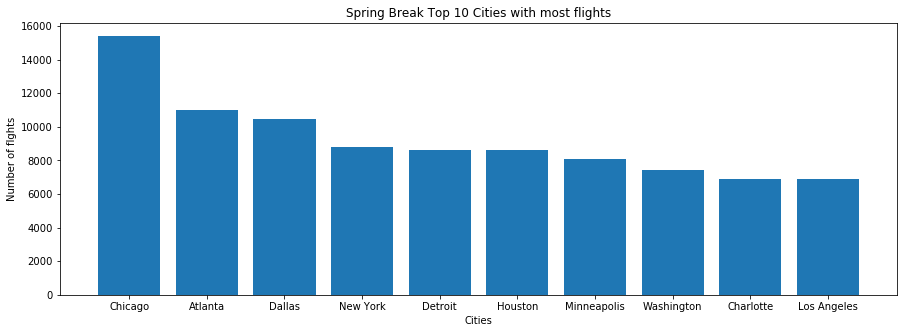

In [26]:
spring_break_flights = spring_list.tolist()
city_list = list(['Chicago','Atlanta','Dallas','New York','Detroit','Houston','Minneapolis','Washington','Charlotte','Los Angeles'])
city_Code = [1,2,3,4,5,6,7,8,9,10]
LABELS = city_list
plt.figure(figsize=(15,5))
plt.bar(city_Code, spring_break_flights, align='center')
plt.xticks(city_Code, LABELS)
plt.title("Spring Break Top 10 Cities with most flights")
plt.xlabel("Cities")
plt.ylabel("Number of flghts")
plt.show()

In [27]:
#new column feature Passengers per Flight
data['Passengers per Flight'] = data.Passengers/(data.Flights)

In [28]:
# choose top 100 cities based on break and filter 
a = SpringBreak_df.groupby(['Break'])['Destination City'].value_counts().head(100)
a_num = a.tolist()
b = WinterBreak_df.groupby(['Break'])['Destination City'].value_counts().head(100)
b_num = b.tolist()
c = SummerBreak_df.groupby(['Break'])['Destination City'].value_counts().head(100)
c_num = c.tolist()

d = [list(a.ix[k].index) for k in a.index.levels[0]]
e = [list(b.ix[k].index) for k in b.index.levels[0]]
f = [list(c.ix[k].index) for k in c.index.levels[0]]

spring_list = zip(d[0],a_num)
winter_list = zip(e[0],b_num)
summer_list = zip(f[0],c_num)
spring_dic = dict(spring_list)
winter_dic = dict(winter_list)
summer_dic = dict(summer_list)

In [29]:
# Spring Break
special_res_spring = []
res_spring = []
for item in spring_dic:
    if item not in winter_dic or item not in summer_dic:
        special_res_spring.append(item)
    elif item in winter_dic and item in summer_dic:
        if spring_dic[item] > winter_dic[item] or spring_dic[item] > summer_dic[item]:
            res_spring.append(item)
print ('special spring break cities: ') + str(special_res_spring)
print ('increasing spring break cities: ') + str(res_spring)

special spring break cities: ['Myrtle Beach, SC', 'Baton Rouge, LA', 'Pensacola, FL', 'Atlantic City, NJ']
increasing spring break cities: []


In [30]:
# Summer Break
special_res_summer = []
res_summer = []
for item in summer_dic:
    if item not in winter_dic or item not in spring_dic:
        special_res_summer.append(item)
    elif item in winter_dic and item in spring_dic:
        if summer_dic[item] > winter_dic[item] and summer_dic[item] > spring_dic[item]:
            res_summer.append(item)
print ('special summer break cities: ') + str(special_res_summer)
print ('increasing summer break cities: ') + str(res_summer)

special summer break cities: ['Sioux Falls, SD', 'Myrtle Beach, SC', 'Fairbanks, AK', 'Atlantic City, NJ']
increasing summer break cities: ['Des Moines, IA', 'Fort Wayne, IN', 'Tulsa, OK', 'Milwaukee, WI', 'El Paso, TX', 'South Bend, IN', 'Knoxville, TN', 'Rochester, NY', 'Atlanta, GA', 'Kansas City, MO', 'Midland, TX', 'Fort Lauderdale, FL', 'Harrisburg, PA', 'Phoenix, AZ', 'Spokane, WA', 'Manchester, NH', 'Reno, NV', 'Houston, TX', 'San Antonio, TX', 'Newark, NJ', 'Shreveport, LA', 'Wilmington, OH', 'Oklahoma City, OK', 'Syracuse, NY', 'Huntsville, AL', 'Columbia, SC', 'Boston, MA', 'Memphis, TN', 'Omaha, NE', 'Savannah, GA', 'Birmingham, AL', 'Jackson, MS', 'Little Rock, AR', 'Detroit, MI', 'Colorado Springs, CO', 'Seattle, WA', 'Kahului, HI', 'Honolulu, HI', 'Santa Ana, CA', 'Indianapolis, IN', 'Sacramento, CA', 'San Diego, CA', 'Toledo, OH', 'Dallas, TX', 'Pittsburgh, PA', 'Washington, DC', 'Wichita, KS', 'San Jose, CA', 'San Francisco, CA', 'West Palm Beach, FL', 'Green Bay, WI',

In [31]:
# Winter Break
special_res_winter = []
res_winter = []
for item in winter_dic:
    if item not in summer_dic or item not in spring_dic:
        special_res_winter.append(item)
    elif item in winter_dic and item in spring_dic:
        if winter_dic[item] > summer_dic[item] and winter_dic[item] > spring_dic[item]:
            res_winter.append(item)
print ('special winter break cities: ') + str(special_res_winter)
print ('increasing winter break cities: ') + str(res_winter)

special winter break cities: ['Sioux Falls, SD', 'Roanoke, VA', 'Baton Rouge, LA', 'Pensacola, FL']
increasing winter break cities: []


In [32]:
# create a new dataframe for winter break based on loaded lat and lon
new_data = pd.DataFrame({'city': ['Sioux Falls, SD', 'Roanoke, VA', 'Baton Rouge, LA', 'Pensacola, FL'], 
                         'lat': [43.5446, 37.2710, 30.4583, 30.4213], 
                         'lon': [-96.7311, -79.9414, -91.1403, -87.2169], 
                         'flight amount': [894, 874,993,962], 
                         'break':['winter break','winter break','winter break','winter break']},index=[0, 1, 2, 3])

In [33]:
# create a new dataframe for summer break based on loaded lat and lon
new_data2 = pd.DataFrame({'city': ['Sioux Falls, SD','Myrtle Beach, SC', 'Fairbanks, AK', 'Atlantic City, NJ'], 
                          'lat': [43.5446, 33.6891, 64.8378, 39.3643],
                          'lon': [-96.7311, -78.8867, -147.7164, -74.4229],
                          'flight amount': [1428, 1847, 1480, 1585], 
                          'break':['summer break', 'summer break','summer break','summer break']},index=[4, 5, 6, 7])

In [34]:
# create a new dataframe for spring break based on loaded lat and lon
new_data3 = pd.DataFrame({'city': ['Myrtle Beach, SC', 'Baton Rouge, LA', 'Pensacola, FL', 'Atlantic City, NJ'], 
                          'lat': [33.6891, 30.4583, 30.4213, 39.3643],
                          'lon': [-78.8867, -91.1403, -87.2169, -74.4229],
                          'flight amount': [514, 494, 443, 504], 
                          'break':['spring break','spring break','spring break', 'spring break']},index=[8, 9, 10, 11])

In [35]:
# create a new dataframe for all holidays based on loaded lat and lon
new_data4 = pd.DataFrame({'city': ['Atlanta, GA', 'Dallas, TX', 'New York, NY', 'Houston, TX', 'Detroit, MI', 'Minneapolis, MN', 'Washington, DC', 'Charlotte, NC', 'Newark, NJ', 'Los Angeles, CA'], 
                          'lat': [33.7490, 32.7767, 40.7128, 39.3643,42.3314,44.9778, 38.9072, 35.2271, 40.7357, 34.0522],
                          'lon': [-84.3880, -96.7970, -74.0060, -74.4229, -83.0458, -93.2650, -77.0369, -80.8431, -74.1724, -118.2437],
                          'flight amount': [2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000, 2000], 
                          'break':['all break','all break','all break','all break','all break','all break','all break','all break','all break','all break']},
                         index=[12,13,14,15,16,17,18,19,20,21])

In [36]:
# combine data frame to make plot
frames = [new_data, new_data2, new_data3, new_data4]
final_data = pd.concat(frames)

In [37]:
final_data

,break,city,flight amount,lat,lon
0,winter break,"Sioux Falls, SD",894,43.5446,-96.7311
1,winter break,"Roanoke, VA",874,37.2710,-79.9414
2,winter break,"Baton Rouge, LA",993,30.4583,-91.1403
3,winter break,"Pensacola, FL",962,30.4213,-87.2169
4,summer break,"Sioux Falls, SD",1428,43.5446,-96.7311
5,summer break,"Myrtle Beach, SC",1847,33.6891,-78.8867
6,summer break,"Fairbanks, AK",1480,64.8378,-147.7164
7,summer break,"Atlantic City, NJ",1585,39.3643,-74.4229
8,spring break,"Myrtle Beach, SC",514,33.6891,-78.8867
9,spring break,"Baton Rouge, LA",494,30.4583,-91.1403


In [38]:
# import plotly module to draw USA map
import plotly
plotly.tools.set_credentials_file(username='skb888', api_key='ehY6fnjqprA9ETSRcsQK')
plotly.tools.set_config_file(world_readable=True,sharing='public')

In [39]:
import plotly.plotly as py

limits = [(0,4),(4,8),(8,12),(12,22)]
colors = ['rgb(0,116,217)','rgb(255,65,54)','rgb(133,20,75)','rgb(255,133,27)']
cities = []
scale = 10

for i in range(len(limits)):
    lim = limits[i]
    df_sub = final_data[lim[0]:lim[1]]    
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        marker = dict(
            size = df_sub['flight amount']/scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

layout = dict(
        title = 'Popular Travel Cities During Break',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )